<a href="https://colab.research.google.com/github/samyukthaananthan02/64060_sananth1/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
train_labels[0]

1

In [ ]:
max([max(sequence) for sequence in train_data])

9999

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
model.compile(optimizer="adam",
              loss="mean_squared_error",
              metrics=["accuracy"])

### Validating the approach

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
## model planned to train with 20 epoch with batch size of 256

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=256,
                    validation_data=(x_val, y_val))

Epoch 1/20
59/59 [==============================] - 4s 58ms/step - loss: 0.1226 - accuracy: 0.8368 - val_loss: 0.0857 - val_accuracy: 0.8841
Epoch 2/20
59/59 [==============================] - 2s 33ms/step - loss: 0.0484 - accuracy: 0.9397 - val_loss: 0.0900 - val_accuracy: 0.8799
Epoch 3/20
59/59 [==============================] - 2s 38ms/step - loss: 0.0304 - accuracy: 0.9658 - val_loss: 0.0980 - val_accuracy: 0.8766
Epoch 4/20
59/59 [==============================] - 2s 42ms/step - loss: 0.0229 - accuracy: 0.9747 - val_loss: 0.1051 - val_accuracy: 0.8742
Epoch 5/20
59/59 [==============================] - 2s 29ms/step - loss: 0.0188 - accuracy: 0.9793 - val_loss: 0.1108 - val_accuracy: 0.8687
Epoch 6/20
59/59 [==============================] - 2s 29ms/step - loss: 0.0188 - accuracy: 0.9785 - val_loss: 0.1136 - val_accuracy: 0.8683
Epoch 7/20
59/59 [==============================] - 2s 30ms/step - loss: 0.0186 - accuracy: 0.9793 - val_loss: 0.1158 - val_accuracy: 0.8676
Epoch 8/20
59

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plotting the train & Validation loss

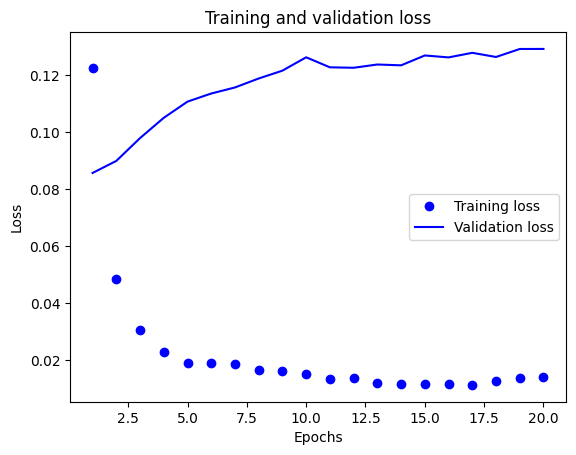

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

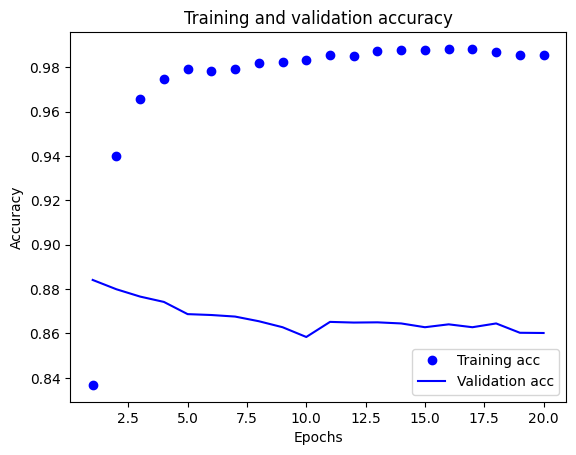

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.1475 - accuracy: 0.8412


In [ ]:
results

[0.14749561250209808, 0.8411999940872192]

#### Combining all code together along with dropout layer

In [ ]:
## Libraries required for setting up an environment

from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras import regularizers

In [ ]:
# Neural network implementation using 3 layered approach with a single dropout layer
model = keras.Sequential()
model.add(Dense(32,activation='tanh'))
model.add(Dropout(0.5))
#kernel_regularizer=regularizers.L1(0.01), activity_regularizer=regularizers.L2(0.01))
model.add(Dense(32,activation='tanh',kernel_regularizer=regularizers.L1(0.01), activity_regularizer=regularizers.L2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(32,activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Here for compilation we used optimizer "adagrad", mean squared error loss and accuracy metrics
model.compile(optimizer="adam",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [ ]:
## splitting the data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
# Train a neural network
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=256,
                    validation_data=(x_val, y_val))

Epoch 1/20
59/59 [==============================] - 5s 68ms/step - loss: 1.4999 - accuracy: 0.7751 - val_loss: 1.1590 - val_accuracy: 0.8816
Epoch 2/20
59/59 [==============================] - 2s 33ms/step - loss: 0.9297 - accuracy: 0.9015 - val_loss: 0.7133 - val_accuracy: 0.8878
Epoch 3/20
59/59 [==============================] - 2s 34ms/step - loss: 0.5341 - accuracy: 0.9317 - val_loss: 0.4019 - val_accuracy: 0.8861
Epoch 4/20
59/59 [==============================] - 2s 34ms/step - loss: 0.2682 - accuracy: 0.9442 - val_loss: 0.2035 - val_accuracy: 0.8871
Epoch 5/20
59/59 [==============================] - 2s 35ms/step - loss: 0.1262 - accuracy: 0.9531 - val_loss: 0.1300 - val_accuracy: 0.8867
Epoch 6/20
59/59 [==============================] - 2s 40ms/step - loss: 0.0848 - accuracy: 0.9629 - val_loss: 0.1167 - val_accuracy: 0.8879
Epoch 7/20
59/59 [==============================] - 2s 42ms/step - loss: 0.0736 - accuracy: 0.9669 - val_loss: 0.1145 - val_accuracy: 0.8864
Epoch 8/20
59

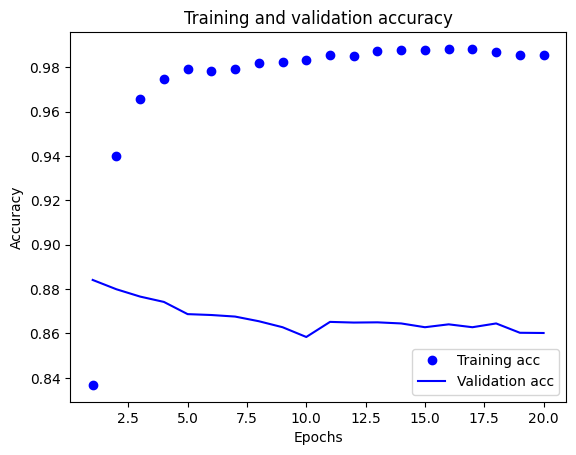

In [ ]:
# plotting the Training and Validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# Evaluating the results
results = model.evaluate(x_test, y_test)
results


782/782 [==============================] - 2s 3ms/step - loss: 0.1243 - accuracy: 0.8618


[0.12426195293664932, 0.8618000149726868]